# Identifying Wild Mushrooms: what to forage, what to avoid?

Through classification modeling, this project aims to classify mushrooms as edible or poisonous.

In recent years, the popularity of mushrooms as a superfood and the understanding of their vast health benefits has surged. What used to be typically seen as just a traditional food, mushrooms are now being widely consumed and acknowledged for their healing and health abilities. With more and more people interested, foraging for mushrooms in the wild is likely to increase and I wanted to understand if edible/poisonous mushrooms could be easily indentified and what that looks like.

The raw dataset utilized in this project was sourced from the UCI Machine Learning Repository. The dataset includes categorical characteristics on 8,124 mushroom samples from 23 species of gilled mushrooms.

My original hypothesis was that a mushroom's cap color would greatly influence its classification.

### Data Cleaning

- all binary features were re-assigned to 0 and 1 values (including the target feature)
- stalk-root contained values labeled as '?', these were assigned to an 'other' value
- veil-type was dropped since all values were the same and would carry no influence in the model 
- ring-number values were re-assigned to their true numerical representation -> 0,1,2
- one-hot encoding was applied to all features that were not binary or ordinal/numeric

### Importing necessary libraries

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',100)
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import plot_confusion_matrix
import pickle
import graphviz

### EDA
- EDA was initally performed on the dataset before one-hot encoding was applied to understand categorical distributions of features

Feature value key: 
1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=1,no=0
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=1,free=0
7. gill-spacing: close=0,crowded=1
8. gill-size: broad=0,narrow=1
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=0,tapering=1
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-color: brown=n,orange=o,white=w,yellow=y
17. ring-number: none=n,one=o,two=t
18. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
19. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
20. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
21. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d



In [3]:
#reading in cleaned, complete dataset before one-hot encoding for visualizing
data=pd.read_pickle('EDAdata.pkl')


In [4]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,1,p,0,0,1,k,0,e,s,s,w,w,w,1,p,k,s,u
1,e,x,s,y,1,a,0,0,0,k,0,c,s,s,w,w,w,1,p,n,n,g
2,e,b,s,w,1,l,0,0,0,n,0,c,s,s,w,w,w,1,p,n,n,m
3,p,x,y,w,1,p,0,0,1,n,0,e,s,s,w,w,w,1,p,k,s,u
4,e,x,s,g,0,n,0,1,0,k,1,e,s,s,w,w,w,1,e,n,a,g


In [5]:
data.shape

(8124, 22)

In [6]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

#### What does the target / class balance look like? 

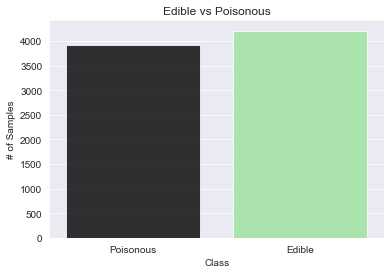

In [7]:
#target variable countplot
#mostly balanced target
sns.set_style('darkgrid')
plt.figure()
fig1=sns.countplot(data['class'], alpha =.80, palette= ['black','lightgreen'])
plt.title('Edible vs Poisonous')
plt.ylabel('# of Samples')
plt.xlabel('Class')
fig1.set(xticklabels=['Poisonous','Edible'])
plt.show()

#### Visualizing features
- all features are categorical with an assortment of values
- some features are mostly evenly spread per the samples like cap surface
- some features like odor have clear majority values, possible correlation to edible or poisonous? 

In [33]:
features=data.drop(columns='class')

#creating a function to countplot features to see breakout, input column name
                       
def featureplot(col):
    sns.set_style('white')
    plt.figure()
    sns.countplot(features[col],alpha =.80)
    plt.ylabel('# of samples')
    plt.title('Mushroom' + ' ' + col.title())
    plt.xlabel('Type of' + ' ' + col.title())
    

    plt.show() 
                        

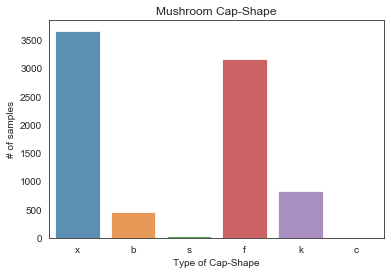

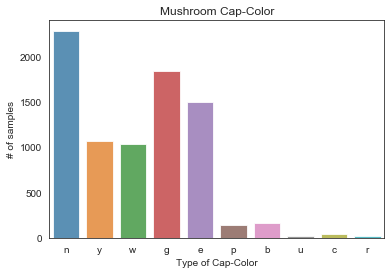

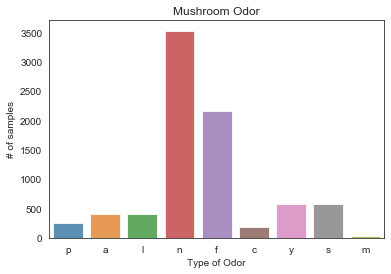

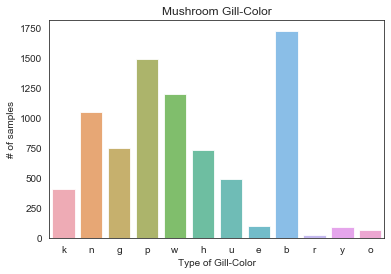

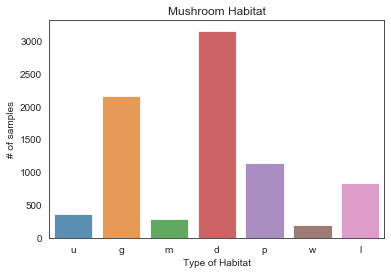

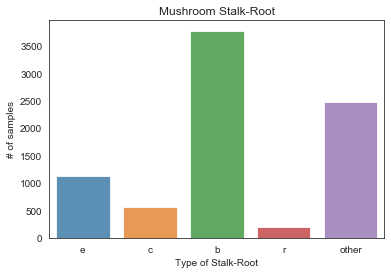

In [29]:
featureplot('cap-shape')
featureplot('cap-color')
featureplot('odor')
featureplot('gill-color')
featureplot('habitat')
featureplot('stalk-root')


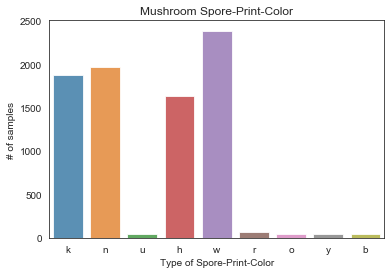

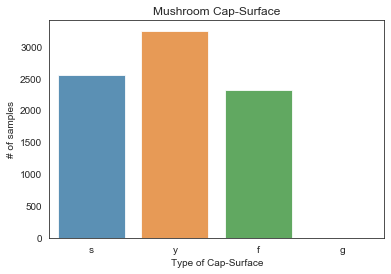

In [32]:
featureplot('spore-print-color')
featureplot('cap-surface')

#### Visualizing feature/class separation - what do the relationships look like between a feature's values and whether the mushroom is edible or poisonous?
- population, gill color, odor, surface above/below ring, spore print color all have dominant values which show seperation between classes
- gill-attachment and veil-color hardly show any value seperation with class

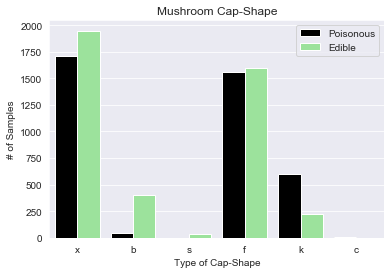

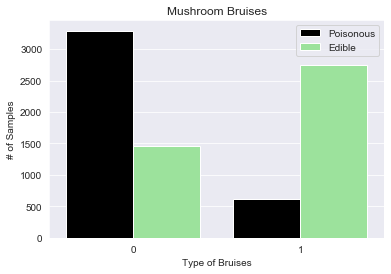

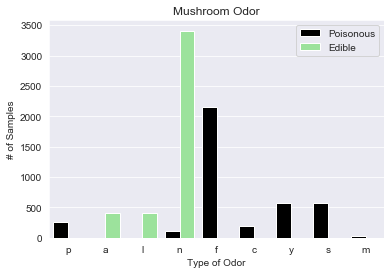

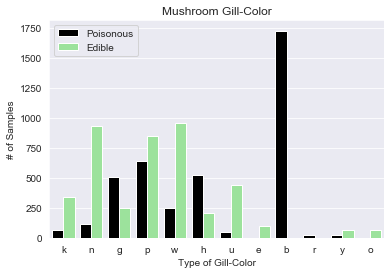

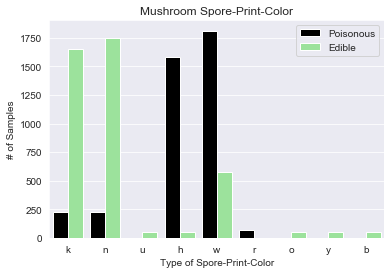

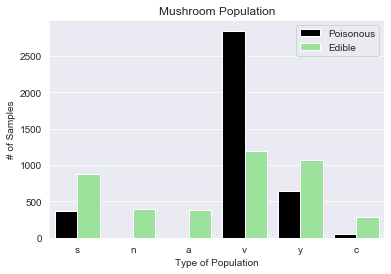

In [44]:
#creating function to create countplots for features stacked with class

def featureclassplot(col):
    fig,ax=plt.subplots()
    sns.set_style('darkgrid')
    sns.countplot(col,hue=data['class'],palette=['black','lightgreen'],data=data)
    plt.ylabel('# of Samples')
    plt.xlabel('Type of' + ' ' + col.title())
    plt.title('Mushroom' + ' ' + col.title())
    plt.legend(title=None,labels=['Poisonous','Edible'])
    plt.show()
    
featureclassplot('cap-shape')
featureclassplot('bruises')
featureclassplot('odor')
featureclassplot('gill-color')
featureclassplot('spore-print-color')
featureclassplot('population')


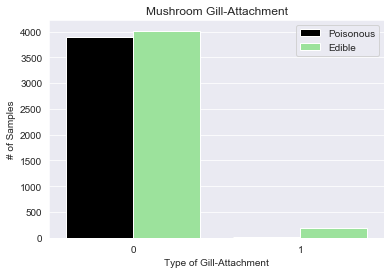

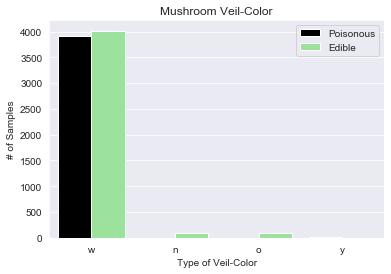

In [46]:
featureclassplot('gill-attachment')
featureclassplot('veil-color')

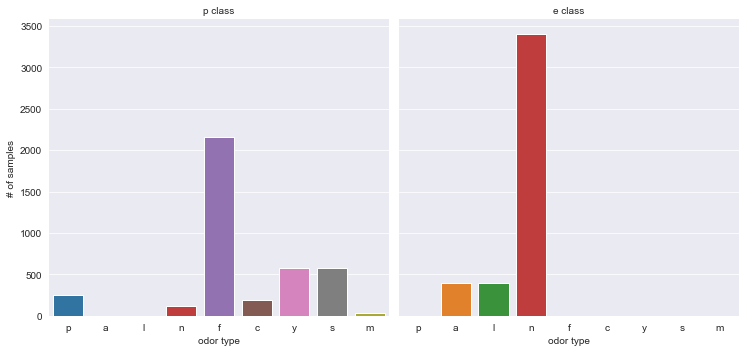

In [49]:
#more visualizations using catplot
#side by side comparison of odor and class
g=sns.catplot('odor',col='class',data=data,kind='count',col_wrap=4)
g.set_axis_labels("odor type", "# of samples")
g.set_titles("{col_name} {col_var}")
g.despine(left=True) 
plt.show()

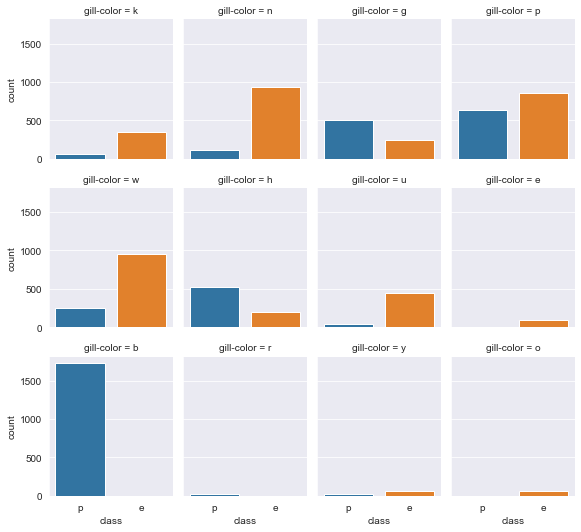

In [51]:
sns.catplot('class',col='gill-color',data=data,kind='count',height=2.5,aspect=.8,col_wrap=4)


In [4]:
#reading in final csv after one-hot encoding applied, original columns dropped
#all values in dataset are now 0 and 1
df=pd.read_csv('final_mushroom_data.csv',index_col=0)

#### What is the correlation between features? between each feature and class?

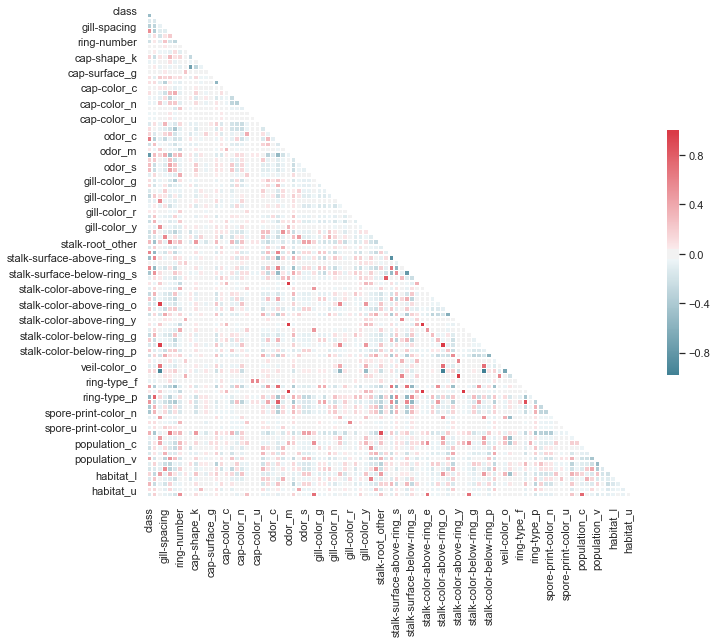

In [55]:
#correlation matrix
corr=df.corr()

#plotting correlation matrix
sns.set(style="white")

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [58]:
corr[abs(corr>.70)]
#gill size, stalk surface above ring_k and odor_f all appear to be the highest correlated with class

,class,bruises,gill-attachment,gill-spacing,gill-size,stalk-shape,ring-number,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-root_c,stalk-root_e,stalk-root_other,stalk-root_r,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-color_o,veil-color_w,veil-color_y,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_c,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
class,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bruises,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.767036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gill-attachment,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.955097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.955097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gill-spacing,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gill-size,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
habitat_l,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [60]:
corr['class'].sort_values(ascending=False).head(10)

class                         1.000000
odor_f                        0.623842
stalk-surface-above-ring_k    0.587658
stalk-surface-below-ring_k    0.573524
gill-size                     0.540024
spore-print-color_h           0.490229
ring-type_l                   0.451619
population_v                  0.443722
spore-print-color_w           0.357384
habitat_p                     0.323346
Name: class, dtype: float64

### Modeling

In [61]:
df.head()

,class,bruises,gill-attachment,gill-spacing,gill-size,stalk-shape,ring-number,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-root_c,stalk-root_e,stalk-root_other,stalk-root_r,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-color_o,veil-color_w,veil-color_y,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_c,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [5]:
#defining target and features for models
df.drop(columns='gill-attachment',inplace=True)
y=df['class']
X=df.drop(['class'],axis=1)


In [6]:
#creating test/train split
#scaling not necessary
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)


In [11]:
#setting up results dictionary to save different model results here
results_dict={}

In [9]:
#function to get best model stats after running gridsearch
def examinebestmodel(model_name):
    print(model_name.best_score_)
    print(model_name.best_params_)
    print(model_name.best_estimator_)


In [8]:
#function to print results with test set and prediction variable
def getresults(test,pred_variable):
    return "F1:", metrics.f1_score(test,pred_variable),"Accuracy:", metrics.accuracy_score(y_test,pred_variable)

#### Dummy Classifier

In [12]:
#dummyclassifier for baseline
#just predicts majority class of training data
#doesn't work great and not useful bc it would leave a person sick for about half

from sklearn.dummy import DummyClassifier

dummy_clf=DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train,y_train)
dummy_pred=dummy_clf.predict(X_test)

results_dict['Dummy Classifier']=getresults(y_test,dummy_pred)
getresults(y_test,dummy_pred)

('F1:', 0.0, 'Accuracy:', 0.5089230769230769)

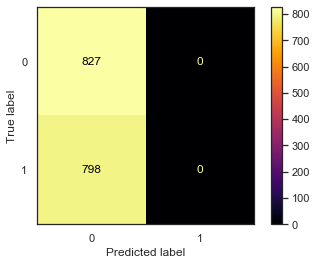

In [87]:
#plot confusion matrix for dummy classifier
plot_confusion_matrix(dummy_clf,X_test,y_test,cmap='inferno',values_format='g')
plt.show()

#### Logistic Regression with GridCV

In [16]:
#logreg model
logreg=LogisticRegression()
penalty = ['l2']
c_range = [0.001, 0.01, 0.1, 1]
solver=['lbfgs']
parameters_lr = dict(C=c_range, penalty=penalty,solver=solver)
lr_1=GridSearchCV(logreg,parameters_lr,scoring='accuracy',cv=2,verbose=1)

In [17]:
#training model and predicting on test set
lr_1.fit(X_train,y_train)

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s finished


GridSearchCV(cv=2, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [18]:
examinebestmodel(lr_1)

0.9992306745270734
{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [19]:
#predict on test set - logreg
y_pred_lr_1=lr_1.best_estimator_.predict(X_test)
results_dict['Log_Reg']=getresults(y_test,y_pred_lr_1)
getresults(y_test,y_pred_lr_1)

('F1:', 0.9981167608286252, 'Accuracy:', 0.9981538461538462)

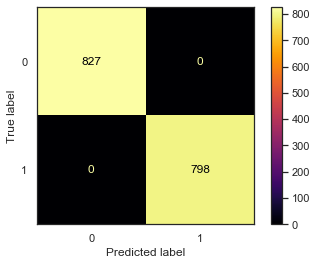

In [88]:
plot_confusion_matrix(lr_1.best_estimator_,X_test,y_test,cmap='inferno',values_format='g')
plt.show()